In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import subprocess
import matplotlib.pyplot as plt

/home/nico/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Correr algoritmos

In [ ]:
# Pipeamos la salida de la consola al proceso este
# Los binarios a ejecutar deberían estar en la carpeta ../cpp
# Si quieren correr desde colab deberían subbir los archivos a su drive y montarlo para que lo tome en el filesystem

def correr_instancia(algoritmo, n): 
    result = subprocess.run([f'../cpp/{algoritmo}'], stdout=subprocess.PIPE, input=n, encoding='ascii')
    return int(result.stdout.split('\n')[0])

In [ ]:
# Ejemplo de corrida
correr_instancia('kahan', '10000')

96467

In [ ]:
resultados = []
algoritmos = ['kahan', 'sorting', 'comoviene']
#for n in [10**x for x in range(7)]:
for n in range(0, 10000, 100):
    if n%1000==0:
        print(n)
    for algoritmo in algoritmos:
        for _ in range(10):
            tiempo =  correr_instancia(algoritmo, str(n))
            resultados.append([n, algoritmo, tiempo])

df_resultados = pd.DataFrame(resultados, columns=['n', 'algoritmo', 'tiempo'])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [ ]:
# Retorna las primeras n rows
df_resultados.head()

,n,algoritmo,tiempo
0,0,kahan,128
1,0,kahan,65
2,0,kahan,476
3,0,kahan,52
4,0,kahan,84


# Analizar resultados

# Comparacion algoritmos

In [ ]:
df_algoritmo = df_resultados.groupby(['n', 'algoritmo'])['tiempo'].mean().reset_index()
df_algoritmo

,n,algoritmo,tiempo
0,0,comoviene,101.6
1,0,kahan,155.4
2,0,sorting,683.4
3,100,comoviene,716.4
4,100,kahan,1155.9
...,...,...,...
295,9800,kahan,95788.1
296,9800,sorting,2577142.4
297,9900,comoviene,48025.7
298,9900,kahan,102154.7


<AxesSubplot:xlabel='n', ylabel='tiempo'>

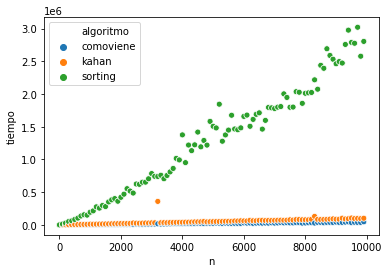

In [ ]:
sns.scatterplot(data=df_algoritmo, x='n', y='tiempo', hue='algoritmo')

<AxesSubplot:xlabel='n', ylabel='tiempo'>

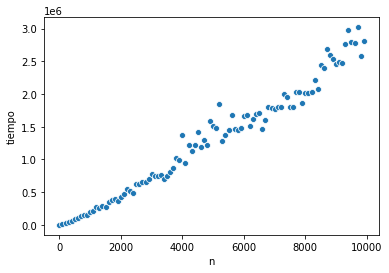

In [ ]:
sns.scatterplot(data=df_algoritmo[df_algoritmo['algoritmo'] == 'sorting'], x='n', y='tiempo')

<AxesSubplot:xlabel='n', ylabel='tiempo'>

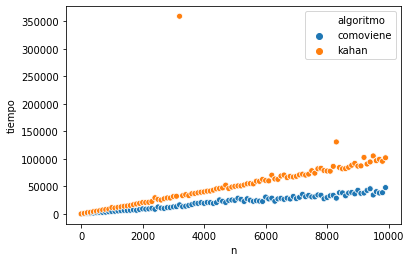

In [ ]:
sns.scatterplot(data=df_algoritmo[df_algoritmo['algoritmo'] != 'sorting'], x='n', y='tiempo', hue='algoritmo')